# Pandas : dataframe and series

## Dataframe

In [5]:
import pandas as pd

### Case 0 : Using Dictionary

In [6]:
students = ["Andi", "Budi", "Cindy"]
scores = [100, 90, 80]

exams = {"students" : students, "scores" : scores}

df_exams = pd.DataFrame(exams)
df_exams

,students,scores
0,Andi,100
1,Budi,90
2,Cindy,80


### Case 1 : From CSV

In [7]:
students = pd.read_csv("meet04\students.csv")

In [8]:
students.head()

,No,Nama,Kelas,Nilai
0,1,Andi,11 KOM 1,100
1,2,Budi,11 KOM 2,90
2,3,Cindi,11 KOM 2,80


In [9]:
print(type(students))

<class 'pandas.core.frame.DataFrame'>


In [10]:
students.columns

Index(['No', 'Nama', 'Kelas', 'Nilai'], dtype='object')

In [11]:
students.shape

(3, 4)

In [12]:
students.iloc[:, :3] 

,No,Nama,Kelas
0,1,Andi,11 KOM 1
1,2,Budi,11 KOM 2
2,3,Cindi,11 KOM 2


### Case 2 : From Numpy

In [19]:
import numpy as np

data = np.array([
    [1, 4],
    [2, 5],
    [3, 6]
])
df = pd.DataFrame(data, columns=["Number 1", "Number2"])
df

,Number 1,Number2
0,1,4
1,2,5
2,3,6


## Series

In [13]:
scores = students["Nilai"]
print(type(scores))

<class 'pandas.core.series.Series'>


In [14]:
scores.describe()

count      3.0
mean      90.0
std       10.0
min       80.0
25%       85.0
50%       90.0
75%       95.0
max      100.0
Name: Nilai, dtype: float64

## Case 0 : NSFG

In [20]:
from statadict import parse_stata_dict

data_file = "meet04/2015_2017_FemPregData.dat"
dict_file = "meet04/2015_2017_FemPregSetup.dct"

stata_dict = parse_stata_dict(dict_file)

nsfg = pd.read_fwf(data_file,
                  names=stata_dict.names,
                  colspecs=stata_dict.colspecs)
print(type(nsfg))
nsfg.head()

#series
pounds = nsfg["BIRTHWGT_LB1"]

<class 'pandas.core.frame.DataFrame'>


In [21]:
import numpy as np
pounds_clean = pounds.replace([98, 99], np.nan)

pounds_clean.describe()

count    6599.000000
mean        6.754357
std         1.383268
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        14.000000
Name: BIRTHWGT_LB1, dtype: float64

In [22]:
weight_p = pounds_clean * 0.453592
weight_p.describe()

count    6599.000000
mean        3.063722
std         0.627439
min         0.000000
25%         2.721552
50%         3.175144
75%         3.628736
max         6.350288
Name: BIRTHWGT_LB1, dtype: float64

In [23]:
ounces = nsfg["BIRTHWGT_OZ1"]
ounces_clean = ounces.replace([98, 99], np.nan)
weight_o = ounces_clean * 0.0283495
weight_o.describe()

count    6540.000000
mean        0.192508
std         0.128489
min         0.000000
25%         0.085048
50%         0.198446
75%         0.311844
max         0.425242
Name: BIRTHWGT_OZ1, dtype: float64

In [24]:
weight_p.value_counts().sort_index()

BIRTHWGT_LB1
0.000000       2
0.453592      28
0.907184      46
1.360776      76
1.814368     179
2.267960     570
2.721552    1644
3.175144    2268
3.628736    1287
4.082328     396
4.535920      82
4.989512      17
5.443104       2
5.896696       1
6.350288       1
Name: count, dtype: int64

In [28]:
weight_o.value_counts().sort_index()

BIRTHWGT_OZ1
0.000000    770
0.028349    294
0.056699    430
0.085048    382
0.113398    390
0.141747    382
0.170097    549
0.198446    376
0.226796    545
0.255146    457
0.283495    327
0.311844    400
0.340194    389
0.368544    275
0.396893    282
0.425242    292
Name: count, dtype: int64

In [26]:
birth_weight = weight_p + weight_o
birth_weight.mean()

3.256889393119266

Text(0.5, 1.0, 'Distribution of U.S. birth weight')

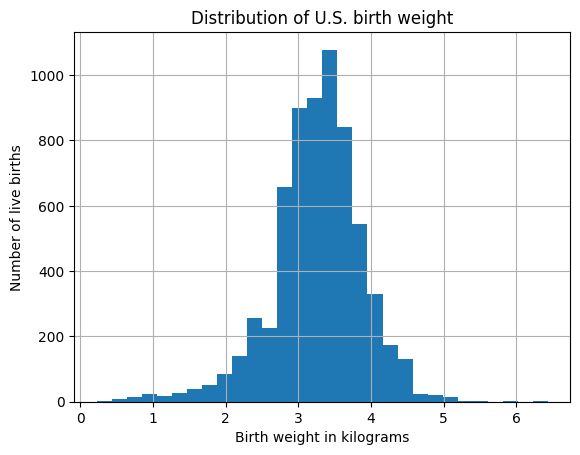

In [29]:
import matplotlib.pyplot as plt
birth_weight.hist(bins=30)
plt.xlabel("Birth weight in kilograms")
plt.ylabel("Number of live births")
plt.title("Distribution of U.S. birth weight")
# plt.show()